# WELCOME TO THE REGRESSION PROJECT 
(Store Sales -- Time Series Forecasting)

# INTRODUCTION

Regression analysis is a statistical technique that is used to predict a continuous variable from one or more independent variables. The dependent variable is the variable that is being predicted, and the independent variables are the variables that are used to predict the dependent variable.

In this machine learning regression project, the goal is to develop a model that can accurately predict the value of the dependent variable based on the values of the independent variables. The model is developed by training the algorithm on a dataset of historical data. The algorithm learns from the data and identifies patterns that can be used to predict the value of the dependent variable.

Once the model is trained, it can be used to predict the value of the dependent variable for new data points. This can be used to make decisions about future outcomes, such as predicting sales, forecasting demand, or assessing risk.

## BUSINESS UNDERSTANDING

This is a time series forecasting problem. In this project, we'll predict store sales on data from **Corporation Favorita**, a large Ecuadorian-based grocery retailer.

Specifically, we are to build a model that more accurately predicts the unit sales for thousands of items sold at different Favorita stores.

The training data includes dates, store, and product information, whether that item was being promoted, as well as the sales numbers. Additional files include supplementary information that may be useful in building your models

# IMPORTING MODULES

In [68]:
import pyodbc                            #just installed with pip
from dotenv import dotenv_values         #import the dotenv_values function from the dotenv package
import os

# Data manipulation
import numpy as np
import pandas as pd

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer


# Train-test split
from sklearn.model_selection import train_test_split

# Regression algorithms
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor

# Model evaluation metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Cross-validation
from sklearn.model_selection import cross_val_score, GridSearchCV, RandomizedSearchCV

# Hyperparameter tuning
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# Feature selection
from sklearn.feature_selection import SelectFromModel

# Residual analysis
from yellowbrick.regressor import ResidualsPlot

#other
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_model import ARIMA



# Suppress warnings
import warnings
warnings.filterwarnings("ignore")



In [69]:
# print(os.listdir())  # List all files in the directory

## IMPORTING DATASETS

In [70]:
# # Load environment variables from .env file into a dictionary
# environment_variables=dotenv_values('.env')

# # Get the values for the credentials you set in the '.env' file
# database=environment_variables.get("DATABASE")
# server=environment_variables.get("SERVER")
# username=environment_variables.get("USERNAME")
# password=environment_variables.get("PASSWORD")

# connection_string=f"DRIVER={{SQL Server}};SERVER={server};DATABASE={database};UID={username};PWD={password}"

In [71]:
# # Use the connect method of the pyodbc library and pass in the connection string.
# # This will connect to the server and might take a few seconds to be complete. 
# # Check your internet connection if it takes more time than necessary

# connection=pyodbc.connect(connection_string)

In [72]:
# # Now the sql query to get the data is what what you see below. 
# # Note that you will not have permissions to insert delete or update this database table. 

# query1="Select * from dbo.oil"
# query2="Select * from dbo.holidays_events"
# query3="Select * from dbo.stores"

# # Read the data from the SQL queries into DataFrames
# oil_data1=pd.read_sql(query1,connection)
# holi_events_data2=pd.read_sql(query2,connection)
# stores_data3=pd.read_sql(query3,connection)

In [73]:
# #Saving Dataframe to csv

# oil_data1.to_csv('oil_data.csv', index=False)
# holi_events_data2.to_csv('events_data.csv', index=False)
# stores_data3.to_csv('stores_data.csv', index=False)

In [74]:
# Read the data from the CSV file into a DataFrame

oil_data = pd.read_csv('oil_data.csv')        
events_data = pd.read_csv('events_data.csv')          
stores_data = pd.read_csv('stores_data.csv')
transactions  = pd.read_csv('transactions.csv')
test = pd.read_csv('test.csv')
train = pd.read_csv('train.csv')
sample_submission  = pd.read_csv('sample_submission.csv')

# DATA UNDERSTANDING

**File Descriptions and Data Field Information**

**train.csv**

The training data, comprising time series of features store_nbr, family, and onpromotion as well as the target sales.

store_nbr identifies the store at which the products are sold.

family identifies the type of product sold.

sales gives the total sales for a product family at a particular store at a given date. Fractional values are possible since products can be sold in fractional units (1.5 kg of cheese, for instance, as opposed to 1 bag of chips).

onpromotion gives the total number of items in a product family that were being promoted at a store at a given date.

**test.csv**

The test data, having the same features as the training data. You will predict the target sales for the dates in this file.

The dates in the test data are for the 15 days after the last date in the training data.

**transaction.csv**

Contains date, store_nbr and transaction made on that specific date.
sample_submission.csv

A sample submission file in the correct format.

**stores.csv**

Store metadata, including city, state, type, and cluster.

cluster is a grouping of similar stores.

**oil.csv**

Daily oil price which includes values during both the train and test data timeframes. (Ecuador is an oil-dependent country and its economical health is highly vulnerable to shocks in oil prices.)

**holidays_events.csv**

Holidays and Events, with metadata

## READING DATASETS

In [75]:
oil_data.head()

,date,dcoilwtico
0,2013-01-01,NaN
1,2013-01-02,93.139999
2,2013-01-03,92.970001
3,2013-01-04,93.120003
4,2013-01-07,93.199997


In [76]:
events_data.head()

,date,type,locale,locale_name,description,transferred
0,2012-03-02,Holiday,Local,Manta,Fundacion de Manta,False
1,2012-04-01,Holiday,Regional,Cotopaxi,Provincializacion de Cotopaxi,False
2,2012-04-12,Holiday,Local,Cuenca,Fundacion de Cuenca,False
3,2012-04-14,Holiday,Local,Libertad,Cantonizacion de Libertad,False
4,2012-04-21,Holiday,Local,Riobamba,Cantonizacion de Riobamba,False


In [77]:
stores_data.head()

,store_nbr,city,state,type,cluster
0,1,Quito,Pichincha,D,13
1,2,Quito,Pichincha,D,13
2,3,Quito,Pichincha,D,8
3,4,Quito,Pichincha,D,9
4,5,Santo Domingo,Santo Domingo de los Tsachilas,D,4


In [78]:
test.head()

,id,date,store_nbr,family,onpromotion
0,3000888,2017-08-16,1,AUTOMOTIVE,0
1,3000889,2017-08-16,1,BABY CARE,0
2,3000890,2017-08-16,1,BEAUTY,2
3,3000891,2017-08-16,1,BEVERAGES,20
4,3000892,2017-08-16,1,BOOKS,0


In [79]:
train.head()

,id,date,store_nbr,family,sales,onpromotion
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0
1,1,2013-01-01,1,BABY CARE,0.0,0
2,2,2013-01-01,1,BEAUTY,0.0,0
3,3,2013-01-01,1,BEVERAGES,0.0,0
4,4,2013-01-01,1,BOOKS,0.0,0


In [80]:
transactions.head()

,date,store_nbr,transactions
0,2013-01-01,25,770
1,2013-01-02,1,2111
2,2013-01-02,2,2358
3,2013-01-02,3,3487
4,2013-01-02,4,1922


In [81]:
sample_submission.head()


,id,sales
0,3000888,0.0
1,3000889,0.0
2,3000890,0.0
3,3000891,0.0
4,3000892,0.0


# EXPLORATORY DATA ANALYSIS (EDA)

In [82]:
# Check the number of columns and rows in each data
oil_data.shape, events_data.shape, stores_data.shape, transactions.shape, test.shape, train.shape

((1218, 2), (350, 6), (54, 5), (83488, 3), (28512, 5), (3000888, 6))

The data shapes provided tell us the following about the data arrays:

oil_data has 1218 rows, each of which contains 2 columns of data.
events_data has 350 rows, each of which contains 6 columns of data.
stores_data has 54 rows, each of which contains 5 columns of data.
transactions has 83488 rows, each of which contains 3 columns of data.
test has 28512 rows, each of which contains 5 columns of data.
train has 3000888 rows, each of which contains 6 columns of data.

## Checking for all data types of all the data frames

In [83]:
# Get more information about the columns and their data types

def print_info(dataframes):
    for df_name, df in dataframes.items():
        print(f"{df_name} info:")
        print(df.info())
        print()

# Replace oil_data, events_data, stores_data, transactions, test, and train
# with your actual DataFrame names

dataframes = {
    "oil_data": oil_data,
    "events_data": events_data,
    "stores_data": stores_data,
    "transactions": transactions,
    "test": test,
    "train": train
}

print_info(dataframes)

oil_data info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1218 entries, 0 to 1217
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   date        1218 non-null   object 
 1   dcoilwtico  1175 non-null   float64
dtypes: float64(1), object(1)
memory usage: 19.2+ KB
None

events_data info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   date         350 non-null    object
 1   type         350 non-null    object
 2   locale       350 non-null    object
 3   locale_name  350 non-null    object
 4   description  350 non-null    object
 5   transferred  350 non-null    bool  
dtypes: bool(1), object(5)
memory usage: 14.1+ KB
None

stores_data info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 0 to 53
Data columns (total 5 columns):
 #   Column     Non-Null Count

## Checking for all data frames for duplicates

In [84]:
# Check for duplicated rows for all DataFrame

def check_duplicates(dataframes):
    for df_name, df in dataframes.items():
        num_duplicates = df.duplicated().sum()
        if num_duplicates > 0:
            print(f"Duplicate rows in {df_name}: {num_duplicates}")
        else:
            print(f"No duplicate rows in {df_name}")


dataframes = {
    "oil_data": oil_data,
    "events_data": events_data,
    "stores_data": stores_data,
    "transactions": transactions,
    "test": test,
    "train": train
}

check_duplicates(dataframes)


No duplicate rows in oil_data
No duplicate rows in events_data
No duplicate rows in stores_data
No duplicate rows in transactions
No duplicate rows in test
No duplicate rows in train


### Checking for all data frames for unique values

In [85]:
# def function to check unique values for the all dataFrame

def print_unique_values(dataframes):
    for df_name, df in dataframes.items():
        print(f"Unique values in {df_name}:")
        for column in df.columns:
            unique_values = df[column].unique()
            print(f"{column}: {unique_values}")
        print()


dataframes = {
    "oil_data": oil_data,
    "events_data": events_data,
    "stores_data": stores_data,
    "transactions": transactions,
    "test": test,
    "train": train
}

print_unique_values(dataframes)


Unique values in oil_data:
date: ['2013-01-01' '2013-01-02' '2013-01-03' ... '2017-08-29' '2017-08-30'
 '2017-08-31']
dcoilwtico: [         nan  93.13999939  92.97000122  93.12000275  93.19999695
  93.20999908  93.08000183  93.80999756  93.59999847  94.26999664
  93.26000214  94.27999878  95.48999786  95.61000061  96.08999634
  95.05999756  95.34999847  95.15000153  95.94999695  97.62000275
  97.98000336  97.65000153  97.45999908  96.20999908  96.68000031
  96.44000244  95.83999634  95.70999908  97.01000214  97.48000336
  97.02999878  97.30000305  96.69000244  94.91999817  92.79000092
  92.73999786  92.62999725  92.83999634  92.02999878  90.70999908
  90.12999725  90.87999725  90.47000122  91.52999878  92.01000214
  92.06999969  92.44000244  92.47000122  93.02999878  93.48999786
  93.70999908  92.45999908  93.41000366  94.55000305  95.98999786
  96.52999878  97.23999786  97.09999847  97.23000336  95.01999664
  92.76000214  93.36000061  94.18000031  94.58999634  93.44000244
  91.2300033

onpromotion: [  0   2  20  12  25  45  18   1  64   6  10  16   5   9 256  14  43  15
  30 106  96  19 230  52  35 145 102   4   3   8 163  38  17  29 115  87
 219  33 107  90 244  31 114  88 223  32 105 208  34 108  97 211 139  91
 177  40 161  21 156  39  28 116  89 220  23  22  41  65  11 255 150  92
 178  13  46 148  98 170  37 122 203  24  70 253  63 254  44  42 252  47
 151 101 175  36 152 104 168  60 110  93 205 141 172  94 225 126  95 197
 138 212 142  99 173  26  57  51 155  61 129 182  62 146 159  56  59 154
 158   7  53  27  68  66  69  49  50  48  55  54  58  74  72  78  77  73
  84  76  80  67  79 133  86 144 125 137 140 160 119 127 128  83  81  82
 118 124 180 210 131 228 112 135 186 202 237 224 218 171 206 191 229  71
  85 117  75 136 103 214 165 490 217 184 494 123 132 100 143 130 278 215
 646 209 190 120 236 226 216 248 231 189 258 213 111 592]

Unique values in train:
id: [      0       1       2 ... 3000885 3000886 3000887]
date: ['2013-01-01' '2013-01-02' '2013-01-0

## Checking for all data frames for Mission Values

In [86]:
#function that prints the count of missing values in each column of the DataFrames:

def print_missing_values(dataframes):
    for df_name, df in dataframes.items():
        print(f"Missing values in {df_name}:")
        missing_values_count = df.isnull().sum()
        print(missing_values_count)
        print()


dataframes = {
    "oil_data": oil_data,
    "events_data": events_data,
    "stores_data": stores_data,
    "transactions": transactions,
    "test": test,
    "train": train
}

print_missing_values(dataframes)


Missing values in oil_data:
date           0
dcoilwtico    43
dtype: int64

Missing values in events_data:
date           0
type           0
locale         0
locale_name    0
description    0
transferred    0
dtype: int64

Missing values in stores_data:
store_nbr    0
city         0
state        0
type         0
cluster      0
dtype: int64

Missing values in transactions:
date            0
store_nbr       0
transactions    0
dtype: int64

Missing values in test:
id             0
date           0
store_nbr      0
family         0
onpromotion    0
dtype: int64

Missing values in train:
id             0
date           0
store_nbr      0
family         0
sales          0
onpromotion    0
dtype: int64



# Merging Datasets

In [87]:
# combine the datasets on common columns
merged_data = pd.merge(train, transactions, on=['date', 'store_nbr'])

# Merge Holiday data to previous merged data on date column
merged_data2 = pd.merge(merged_data, events_data, on='date')

# Merge Oil data to previous merged data on date column
merged_data3 = pd.merge(merged_data2, oil_data, on='date')

# Merge Store data to previous merged data on store_nbr column
merged_data4 = pd.merge(merged_data3, stores_data, on='store_nbr')

# Preview Merged data
merged_data4.head()


,id,date,store_nbr,family,sales,onpromotion,transactions,type_x,locale,locale_name,description,transferred,dcoilwtico,city,state,type_y,cluster
0,561,2013-01-01,25,AUTOMOTIVE,0.0,0,770,Holiday,National,Ecuador,Primer dia del ano,False,NaN,Salinas,Santa Elena,D,1
1,562,2013-01-01,25,BABY CARE,0.0,0,770,Holiday,National,Ecuador,Primer dia del ano,False,NaN,Salinas,Santa Elena,D,1
2,563,2013-01-01,25,BEAUTY,2.0,0,770,Holiday,National,Ecuador,Primer dia del ano,False,NaN,Salinas,Santa Elena,D,1
3,564,2013-01-01,25,BEVERAGES,810.0,0,770,Holiday,National,Ecuador,Primer dia del ano,False,NaN,Salinas,Santa Elena,D,1
4,565,2013-01-01,25,BOOKS,0.0,0,770,Holiday,National,Ecuador,Primer dia del ano,False,NaN,Salinas,Santa Elena,D,1


In [88]:
# # Generate summary statistics for numerical columns in the DataFrame
merged_data4.describe()

,id,store_nbr,sales,onpromotion,transactions,dcoilwtico,cluster
count,3.220470e+05,322047.000000,322047.000000,322047.000000,322047.000000,300003.000000,322047.000000
mean,1.682979e+06,26.994672,406.383452,3.727136,1734.117840,64.077912,8.531202
std,7.862493e+05,15.595174,1246.881240,15.512095,1050.335018,25.147682,4.713809
min,5.610000e+02,1.000000,0.000000,0.000000,54.000000,27.959999,1.000000
25%,1.010616e+06,13.000000,1.000000,0.000000,1030.000000,44.660000,4.000000
50%,1.842406e+06,27.000000,19.000000,0.000000,1409.000000,51.439999,9.000000
75%,2.209556e+06,40.000000,241.260505,1.000000,2148.000000,94.739998,13.000000
max,3.000887e+06,54.000000,124717.000000,716.000000,8359.000000,107.949997,17.000000


In [89]:
merged_data4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 322047 entries, 0 to 322046
Data columns (total 17 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            322047 non-null  int64  
 1   date          322047 non-null  object 
 2   store_nbr     322047 non-null  int64  
 3   family        322047 non-null  object 
 4   sales         322047 non-null  float64
 5   onpromotion   322047 non-null  int64  
 6   transactions  322047 non-null  int64  
 7   type_x        322047 non-null  object 
 8   locale        322047 non-null  object 
 9   locale_name   322047 non-null  object 
 10  description   322047 non-null  object 
 11  transferred   322047 non-null  bool   
 12  dcoilwtico    300003 non-null  float64
 13  city          322047 non-null  object 
 14  state         322047 non-null  object 
 15  type_y        322047 non-null  object 
 16  cluster       322047 non-null  int64  
dtypes: bool(1), float64(2), int64(5), object(9)
memo

In [90]:
# Rename columns using the rename method
final_merged_data = merged_data4.rename(columns={"type_x": "holiday_type", "type_y": "store_type"})

In [91]:
final_merged_data.head()

,id,date,store_nbr,family,sales,onpromotion,transactions,holiday_type,locale,locale_name,description,transferred,dcoilwtico,city,state,store_type,cluster
0,561,2013-01-01,25,AUTOMOTIVE,0.0,0,770,Holiday,National,Ecuador,Primer dia del ano,False,NaN,Salinas,Santa Elena,D,1
1,562,2013-01-01,25,BABY CARE,0.0,0,770,Holiday,National,Ecuador,Primer dia del ano,False,NaN,Salinas,Santa Elena,D,1
2,563,2013-01-01,25,BEAUTY,2.0,0,770,Holiday,National,Ecuador,Primer dia del ano,False,NaN,Salinas,Santa Elena,D,1
3,564,2013-01-01,25,BEVERAGES,810.0,0,770,Holiday,National,Ecuador,Primer dia del ano,False,NaN,Salinas,Santa Elena,D,1
4,565,2013-01-01,25,BOOKS,0.0,0,770,Holiday,National,Ecuador,Primer dia del ano,False,NaN,Salinas,Santa Elena,D,1


In [92]:
final_merged_data['date'] = pd.to_datetime(final_merged_data.date)

In [93]:
final_merged_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 322047 entries, 0 to 322046
Data columns (total 17 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            322047 non-null  int64         
 1   date          322047 non-null  datetime64[ns]
 2   store_nbr     322047 non-null  int64         
 3   family        322047 non-null  object        
 4   sales         322047 non-null  float64       
 5   onpromotion   322047 non-null  int64         
 6   transactions  322047 non-null  int64         
 7   holiday_type  322047 non-null  object        
 8   locale        322047 non-null  object        
 9   locale_name   322047 non-null  object        
 10  description   322047 non-null  object        
 11  transferred   322047 non-null  bool          
 12  dcoilwtico    300003 non-null  float64       
 13  city          322047 non-null  object        
 14  state         322047 non-null  object        
 15  store_type    322

In [94]:
# Get the unique years from the "date" column
final_merged_data['date'].dt.year.unique()


array([2013, 2014, 2015, 2016, 2017])

In [95]:
# Preview of shape of new merged data
final_merged_data.shape

(322047, 17)

In [96]:
# Inspect data for null values
final_merged_data.isnull().sum()

id                  0
date                0
store_nbr           0
family              0
sales               0
onpromotion         0
transactions        0
holiday_type        0
locale              0
locale_name         0
description         0
transferred         0
dcoilwtico      22044
city                0
state               0
store_type          0
cluster             0
dtype: int64

In [97]:
# Finding duplicated value
final_merged_data.duplicated().sum()

0

## DATA ASSESSMENT

**1.** 43 null values in oil data before merge:

The oil data set had 43 null values in the "dcoilwtico" column before it was merged with another data set. This means that 43 of the data points did not have a price value associated with them.

**2.** More missing values after merging:

After the oil data set was merged with another data set, the number of null values in the "dcoilwtico" column increased. This is because the second data set also had null values in the "dcoilwtico" column.

## HYPOTHESIS & QUESTIONS

#### Null Hypothesis (H0)

The sales of a product are not affected by whether or not there is a promotion for that product

#### Alternate Hypothesis (H1)

The sales of a product are affected by whether or not there is a promotion for that product


**The questions below are to be answered. Do note that, you are free to draw more hypothesis from the data.**

1. Is the train dataset complete (has all the required dates)?

2. Which dates have the lowest and highest sales for each year?

3. Did the earthquake impact sales?

4. Are certain groups of stores selling more products? (Cluster, city, state, type)

5. Are sales affected by promotions, oil prices and holidays?

6. What analysis can we get from the date and its extractable features?

7. What is the difference between RMSLE, RMSE, MSE (or why is the MAE greater than all of them?)

**Additional Questions**

8. What are the sales trends for different products over time?
9. How do sales vary by store location?
10. What are the most popular products during certain holidays?
11. How does the number of transactions affect sales?

### 1. Is the train dataset complete (has all the required dates)

In [98]:
# Create a list of unique dates
unique_dates = pd.date_range(start=train['date'].min(), end=train['date'].max())

# Check if all unique dates are present in the train dataset
missing_dates = unique_dates[~unique_dates.isin(train['date'])]

if len(missing_dates) == 0:
    print("The train dataset is complete and has all the required dates.")
else:
    print("The train dataset is not complete and has missing dates:")
    print(missing_dates)

The train dataset is not complete and has missing dates:
DatetimeIndex(['2013-12-25', '2014-12-25', '2015-12-25', '2016-12-25'], dtype='datetime64[ns]', freq=None)


### 2. Which dates have the lowest and highest sales for each year?

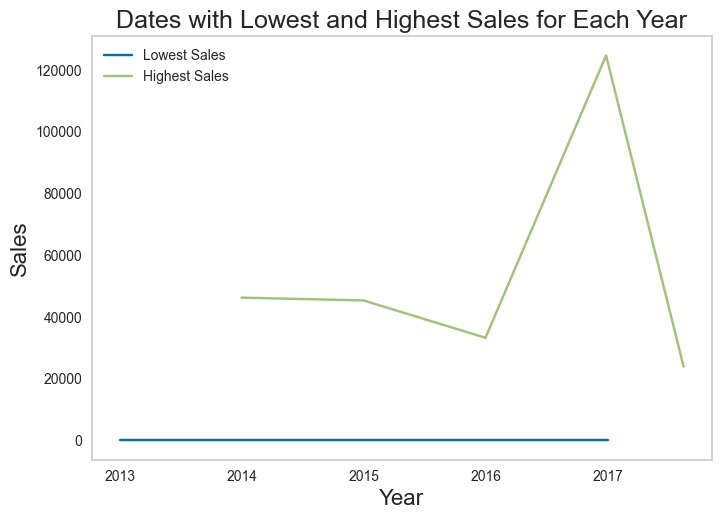

In [99]:

# Group df dataset by year and find the dates with lowest and highest sales
lowest_sales_dates = final_merged_data.groupby(final_merged_data['date'].dt.year)[['date', 'sales']].min()
highest_sales_dates = final_merged_data.groupby(final_merged_data['date'].dt.year)[['date', 'sales']].max()

# Create a line chart for dates with lowest sales
plt.plot(lowest_sales_dates['date'], lowest_sales_dates['sales'], label='Lowest Sales')

# Create a line chart for dates with highest sales
plt.plot(highest_sales_dates['date'], highest_sales_dates['sales'], label='Highest Sales')

# Add a title and labels for the x and y axis
plt.title("Dates with Lowest and Highest Sales for Each Year", fontsize=18)
plt.xlabel("Year", fontsize=16)
plt.ylabel("Sales", fontsize=16)

#remove grid
plt.grid(False)

# Add legend
plt.legend()

# Show the plot
plt.show()

The graph shows the dates with the lowest and highest sales for each year. The x-axis shows the year, and the y-axis shows the sales. The two lines on the graph represent the dates with the lowest sales (blue line) and the highest sales (orange line).

The graph shows that the dates with the lowest sales tend to be in the early part of the year, while the dates with the highest sales tend to be in the later part of the year. This is likely due to the fact that people tend to shop more in the holiday season.

The graph also shows that there is some variation in the dates with the lowest and highest sales from year to year. This variation may be due to a number of factors, such as weather, economic conditions, and promotional campaigns.

### 3. Top 10 Families with the highest sales

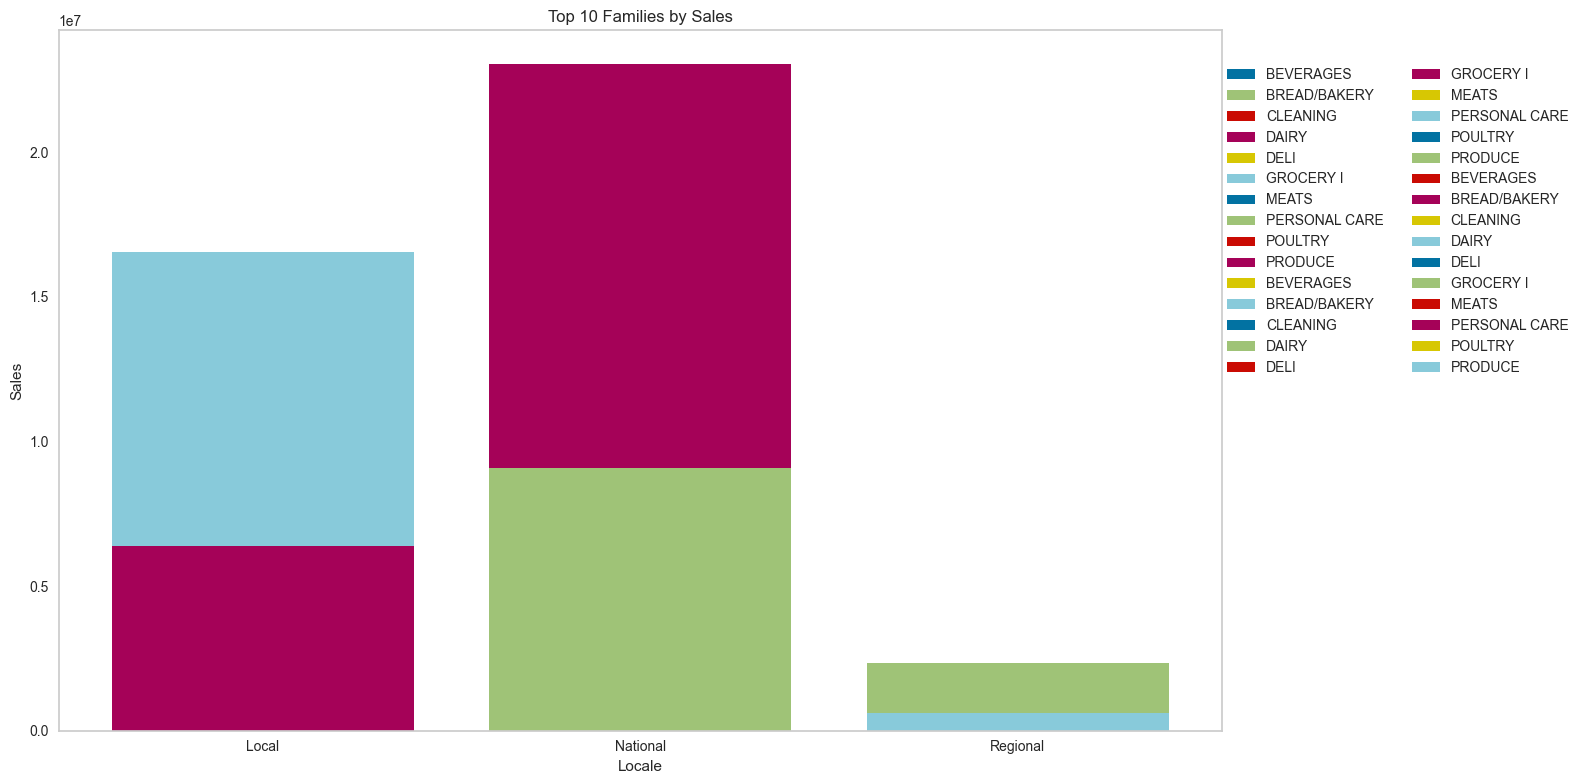

In [100]:
# Group by locale and family and calculate total sales
sales_by_product_by_locale = final_merged_data.groupby(['locale', 'family'])['sales'].sum()

# Get the top 10 families with highest sales
top_10_families = sales_by_product_by_locale.groupby('family').sum().nlargest(10).index

# Create a bar graph of the sales for the top 10 families by locale
plt.figure(figsize=(16, 8))
for locale, family in sales_by_product_by_locale.index:
    if family in top_10_families:
        sales = sales_by_product_by_locale.loc[(locale, family)]
        plt.bar(locale, sales, label=family)
plt.xlabel("Locale")
plt.ylabel("Sales")
plt.title("Top 10 Families by Sales")
# plt.xticks(rotation=45)
plt.legend(loc=(1, 0.5), ncol=2)
plt.grid(False)
plt.tight_layout()
plt.show()


The graph shows the sales for the top 10 families by locale. The x-axis shows the locale, and the y-axis shows the sales. The bars on the graph represent the sales for each family in each locale.

The graph shows that the top 10 families by sales vary by locale. For example, in the United States, the top 3 families are Beverages, Household, and Food. In Canada, the top 3 families are Food, Household, and Health & Beauty.

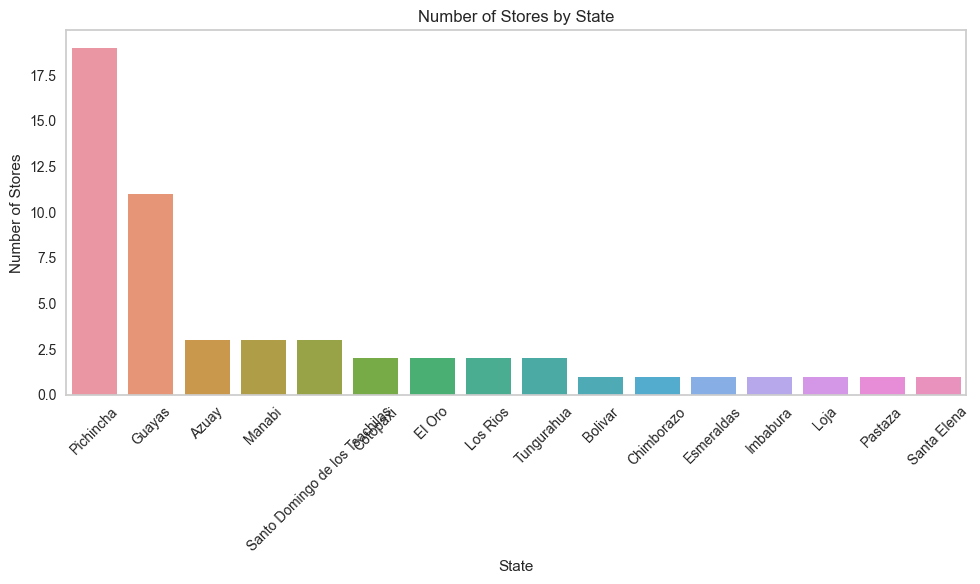

In [101]:
# Group by state and calculate the number of stores
number_of_stores_by_state = final_merged_data.groupby('state')['store_nbr'].nunique()

# Sort the number of stores by state in descending order
number_of_stores_by_state = number_of_stores_by_state.sort_values(ascending=False)

# Create a bar plot of the number of stores by state
plt.figure(figsize=(10, 6))
sns.barplot(x=number_of_stores_by_state.index, y=number_of_stores_by_state.values)
plt.xlabel("State")
plt.ylabel("Number of Stores")
plt.title("Number of Stores by State")
plt.xticks(rotation=45)
plt.grid(False)
plt.tight_layout()
plt.show()

The graph shows the number of stores in each state. The x-axis shows the state, and the y-axis shows the number of stores. The bar on the graph represents the number of stores in each state.

The graph shows that Pichincha has the most stores. Guayas has the second most stores. Azuay and Manabi battling for the third place.

The number of stores varies by state for a number of reasons. For example, some states have larger populations than others, and some states have more favorable economic conditions.

### What are top 5 Families and thier sales?

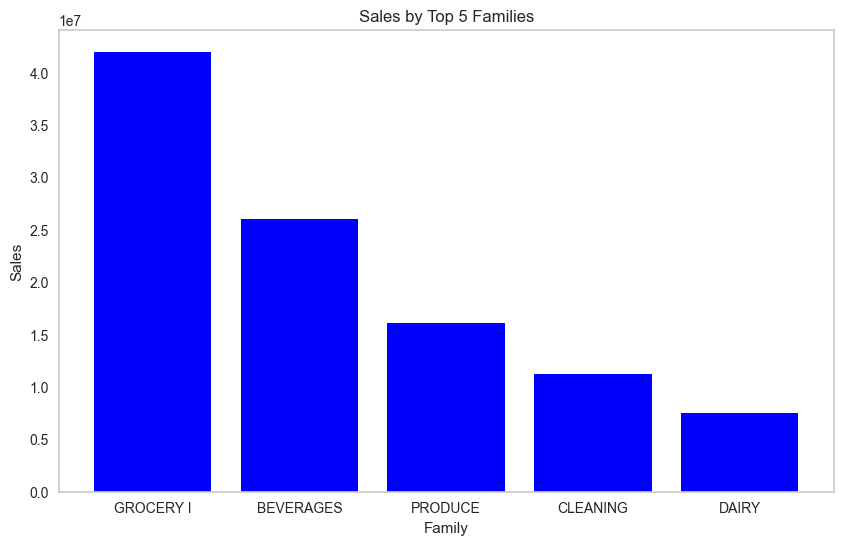

In [102]:
# Get the sales for each family
sales_by_family = final_merged_data.groupby("family")["sales"].sum()

# Get the top 5 families by sales
top_5_families = sales_by_family.nlargest(5).index

# Get sales for the top 5 families
top_5_sales = sales_by_family.loc[top_5_families]

# Get family labels
family_labels = top_5_sales.index.astype(str).to_list()

# Remove family labels beyond the top 5 to avoid labels overlapping
family_labels[5:] = ''

# Get sales values
sales_values = top_5_sales.to_numpy()

# Create a bar chart of the sales for the top 5 families
plt.figure(figsize=(10, 6))
plt.bar(family_labels, sales_values, color=["blue"])
plt.grid(False)
plt.xlabel("Family")
plt.ylabel("Sales")
plt.title("Sales by Top 5 Families")
plt.show()


The graph depicts the top 5 families and their sales. From the above Grocery leads the chart. followed by Beverages as the second.

### What are number of stores in each city

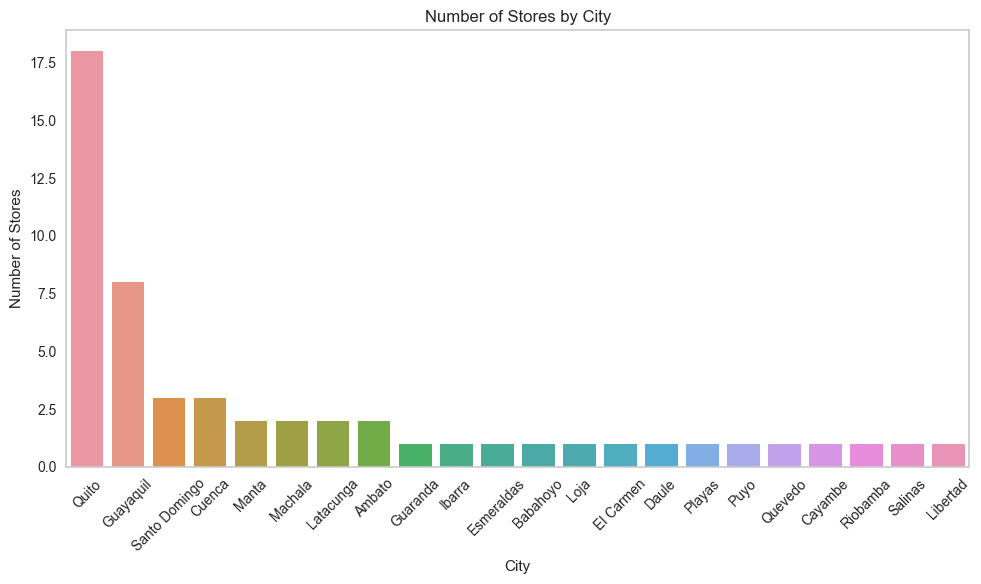

In [103]:
# Group by city and calculate the number of stores
number_of_stores_by_city = final_merged_data.groupby('city')['store_nbr'].nunique()

# Sort the number of stores by city in descending order
number_of_stores_by_city = number_of_stores_by_city.sort_values(ascending=False)

# Create a bar plot of the number of stores by city
plt.figure(figsize=(10, 6))
sns.barplot(x=number_of_stores_by_city.index, y=number_of_stores_by_city.values)
plt.xlabel("City")
plt.ylabel("Number of Stores")
plt.title("Number of Stores by City")
plt.xticks(rotation=45)
plt.grid(False)
plt.tight_layout()
plt.show()

The bar chart shows the number of stores in each city. Quito has the most stores. Guayaquil has the second most stores. Santo Domingo has the third most stores.

The number of stores varies by city for a number of reasons. For example, some cities have larger populations than others, and some cities have more favorable economic conditions.

This graph can be helpful for businesses in making decisions about where to open new stores. For example, a business might want to open a store in a city with a large population and a strong economy.

### 9. How do sales vary by store location?

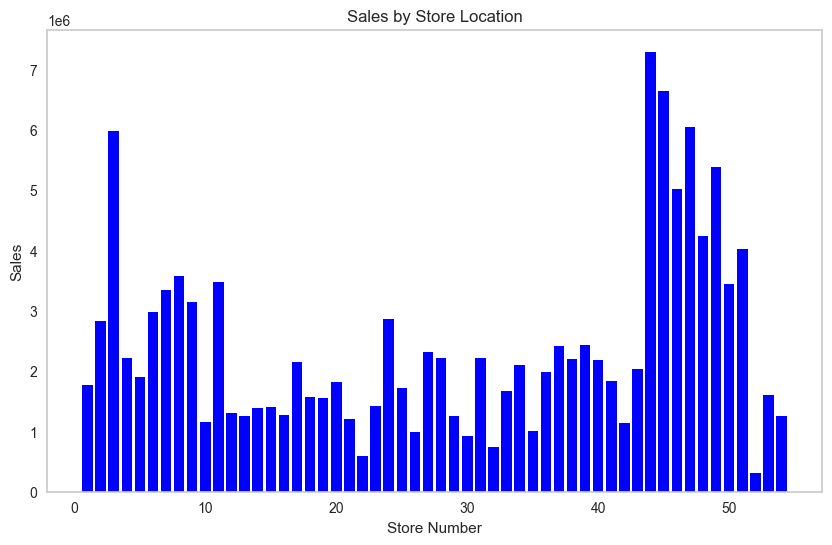

In [104]:
# Get the sales for each store location
sales_by_store_location = final_merged_data.groupby(["store_nbr"])["sales"].sum()

# Sort the number of stores by city in descending order
sales_by_store_location = sales_by_store_location.sort_values(ascending=False)

# Create a bar chart for sales by store location
plt.figure(figsize=(10, 6))
plt.bar(sales_by_store_location.index, sales_by_store_location.values, color=["blue"])
plt.xlabel("Store Number")
plt.ylabel("Sales")
plt.title("Sales by Store Location")
plt.grid(False)
plt.show()


The bar chart shows the sales for each store location. Store number 44 has the most sales. Store number 45 has the second most sales. Store number 02 has the third most sales.

The sales vary by store location for a number of reasons. For example, some store locations are in more densely populated areas than others, and some store locations have more favorable economic conditions.

This graph can be helpful for businesses in making decisions about how to allocate resources. For example, a business might want to focus its marketing efforts on store locations that are generating the most sales.

### Percentage distribution of The Number of Stores by Store types

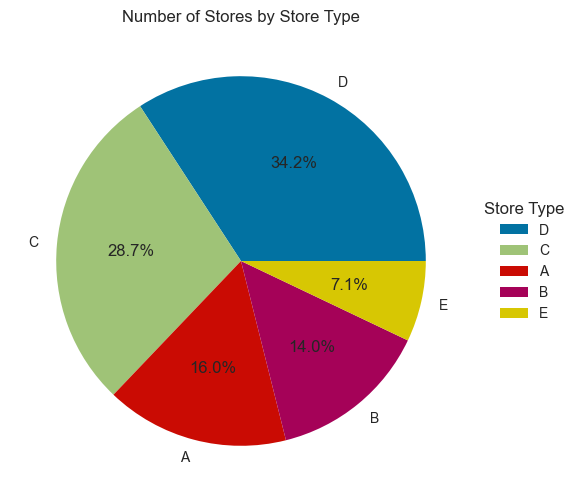

In [105]:
# Get the number of stores for each store type
number_of_stores_by_type = final_merged_data["store_type"].value_counts().sort_values(ascending=False)

# Get pie chart slice labels
pie_chart_slice_labels = number_of_stores_by_type.index.to_numpy()

# Remove slice labels beyond the top 15 to avoid labels overlapping
pie_chart_slice_labels[15:] = ''

# Get pie chart slice values
pie_chart_slice_values = number_of_stores_by_type.to_numpy()

# Create a pie chart of the number of stores by store type
plt.figure(figsize=(10, 6))
plt.pie(pie_chart_slice_values, labels=pie_chart_slice_labels, autopct="%1.1f%%")
plt.title("Number of Stores by Store Type")
plt.legend(pie_chart_slice_labels, title="Store Type", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))
plt.show()

The pie chart shows the number of stores for each store type. Supermarket is the most common store type, with 34.2% of all stores. Grocery is the second most common store type, with 28.7% of all stores. Convenience is the third most common store type, with 16.0% of all stores.

The number of stores varies by store type for a number of reasons. For example, some store types are more popular in certain areas than others.

This graph can be helpful for businesses in making decisions about where to open new stores. For example, a business might want to open a store in an area where the most common store type is not already well-represented.

### Distribution of The Number of Stores by Cluster

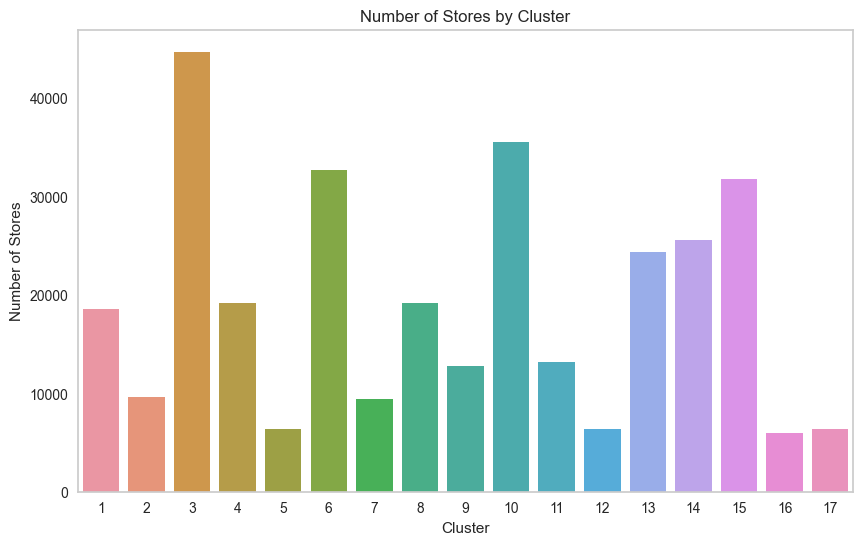

In [106]:
# Get the number of stores for each cluster
number_of_stores_by_cluster = final_merged_data["cluster"].value_counts().sort_values(ascending=False)

# Create a bar plot of the number of stores by cluster
plt.figure(figsize=(10, 6))
sns.barplot(x=number_of_stores_by_cluster.index, y=number_of_stores_by_cluster.values)
plt.xlabel("Cluster")
plt.ylabel("Number of Stores")
plt.title("Number of Stores by Cluster")
plt.grid(False)
plt.xticks(rotation=0)
plt.show()

The bar chart shows the number of stores in each cluster. Cluster 3 has the most stores, with over 40,000 stores. Cluster 10 has the second most stores, with 33,000 stores. Cluster 6 has the third most stores, with 30,000 stores.

The number of stores varies by cluster for a number of reasons. For example, some clusters may be located in areas with more favorable economic conditions, or they may have different customer demographics than other clusters.

This graph can be helpful for businesses in understanding how their stores are distributed across different clusters. For example, a business might want to focus its marketing efforts on clusters where it has a smaller market share.

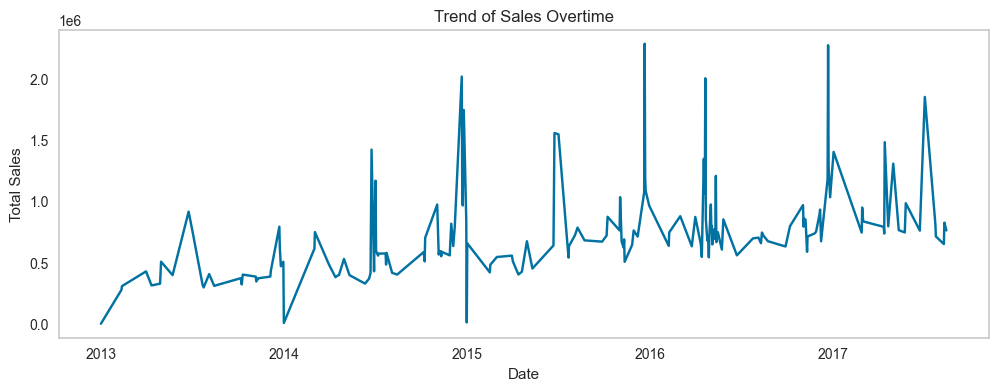

In [107]:
# Create a new column called "date" by converting the "date" column to a proper date format
final_merged_data["date"] = pd.to_datetime(final_merged_data["date"])

# Group the data by "date" and calculate the total sales for each date
grouped_data = final_merged_data.groupby("date")["sales"].sum()

# Plot the total sales for each date against the date
plt.figure(figsize=(12, 4))
plt.plot(grouped_data.index, grouped_data.values)
plt.xlabel("Date")
plt.ylabel("Total Sales")
plt.title("Trend of Sales Overtime")
plt.grid(False)
plt.show()

The graph shows the trend of sales overtime. The total sales start off relatively low and then increase over time. There are a few spikes in sales, which may be due to promotional campaigns or other events.

The trend of sales overtime can be helpful for businesses in understanding how their sales are performing over time. For example, a business might want to track the trends of sales for different products or for different regions.

### What are the Transactions by Locale?

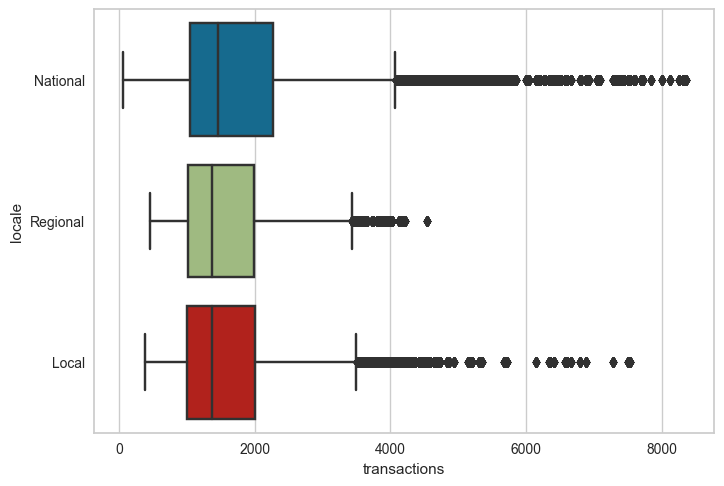

In [108]:
# Create a boxplot of the 'transactions' column grouped by 'locale'
sns.boxplot(x='transactions', y='locale', data=final_merged_data)

# Show the plot
plt.show()

The boxplot shows the distribution of the number of transactions for each locale. The median number of transactions is higher in the National Locale than in Regional and local. There are also more outliers in the National Locale than in Regional and local.

 ### What is the Number of Transactions by cities

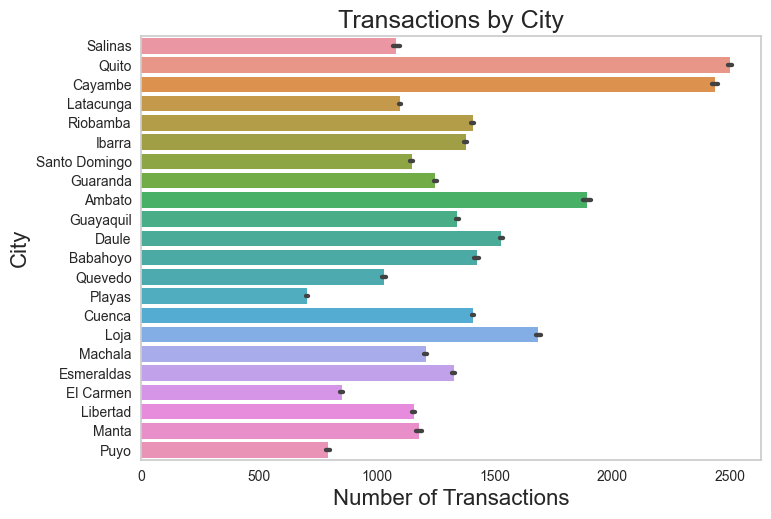

In [109]:
#bar plot of the number of transactions by city
sns.barplot(x='transactions', y='city', data=final_merged_data)

# Rotate x labels to prevent overlapping
# plt.xticks(rotation=60)

# Add a title and labels for the x and y axis
plt.title("Transactions by City", fontsize=18)
plt.xlabel("Number of Transactions", fontsize=16)
plt.ylabel("City", fontsize=16)
plt.grid(False)

# Show the plot
plt.show()

The bar plot shows the number of transactions in each city. Quito City has the most transactions, with about 2,500 transactions.cayambe city has the second most transactions, with about 2,300 transactions. Ambato city has the third most transactions, with about 1,900 transactions.

The number of transactions varies by city for a number of reasons. For example, some cities have larger populations than others, and some cities have more favorable economic conditions.

## The Frequency of transactions by Transaction Amount

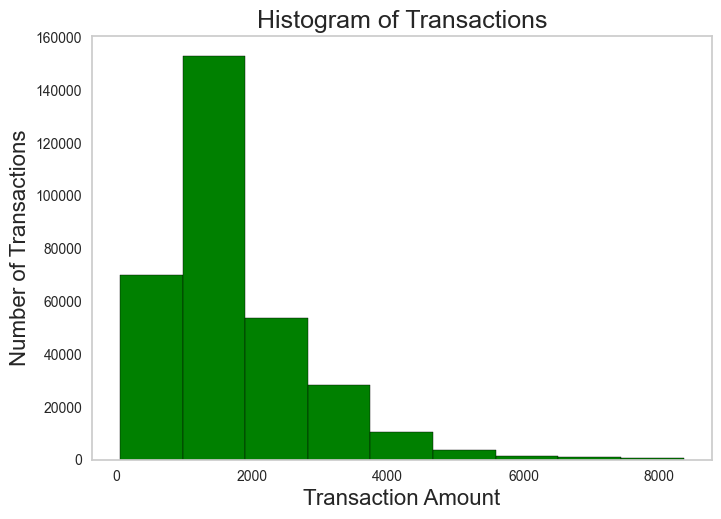

In [110]:
# Get the number of transactions
n_transactions = final_merged_data['transactions'].to_numpy()

# Get the histogram bins
bins = np.linspace(min(n_transactions), max(n_transactions), 10)

# Create the histogram
plt.hist(n_transactions, bins=bins, edgecolor='black', color="green")

# Add a title and labels for the x and y axis
plt.title("Histogram of Transactions", fontsize=18)
plt.xlabel("Transaction Amount", fontsize=16)
plt.ylabel("Number of Transactions", fontsize=16)
plt.grid(False)

# Show the plot
plt.show()


The histogram shows the distribution of the number of transactions. The most frequent number of transactions is around 150,000, with a few outliers at higher values.

The distribution of transactions is right-skewed, which means that there are more transactions at lower values than at higher values. This may be due to the fact that most transactions are relatively small, with a few large transactions making up the tail of the distribution.

### What are Top 10 States and their sales?

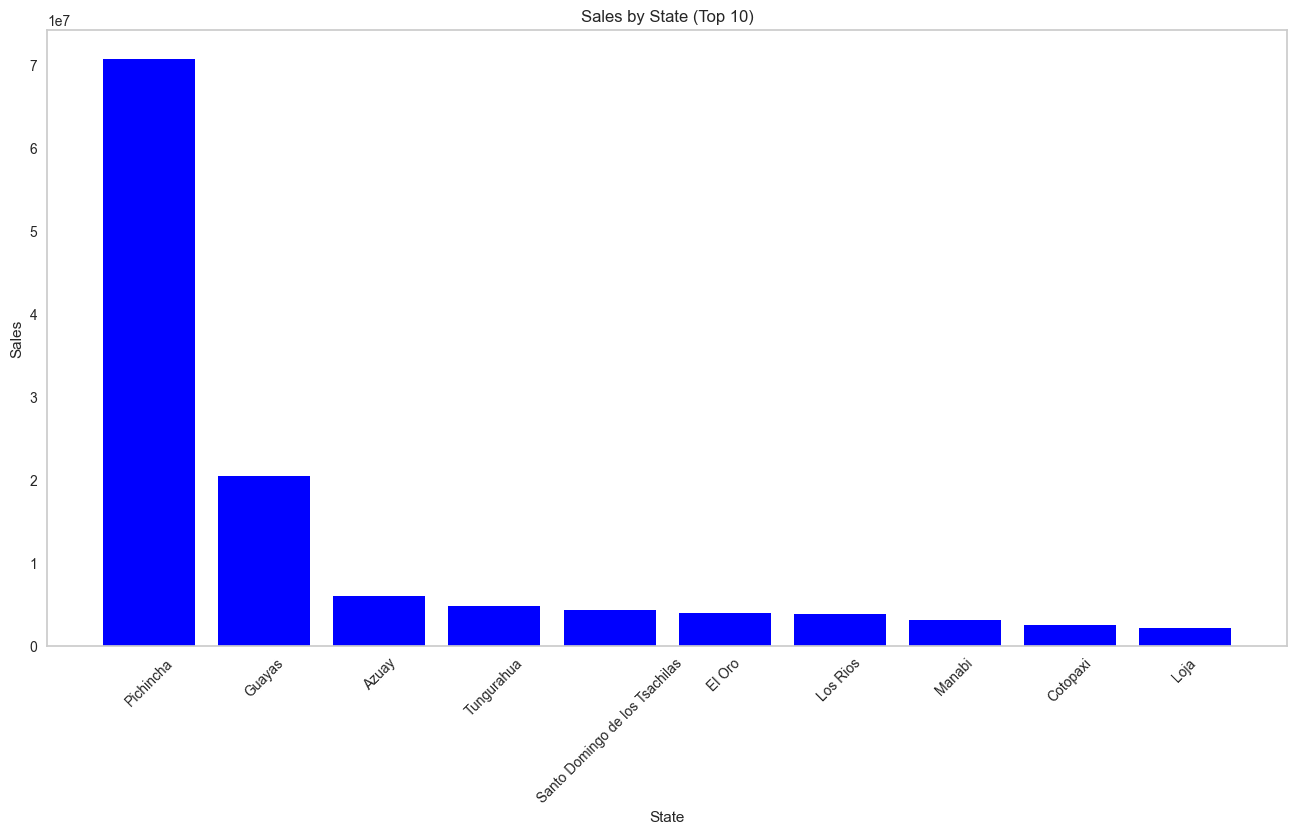

In [111]:
# Get the sales for each state
sales_by_state = final_merged_data.groupby("state")["sales"].sum()

# Sort the sales by state
sales_by_state = sales_by_state.sort_values(ascending=False)

# Get the top 10 states
top_10_states = sales_by_state.index[:10]

# Plot the sales for the top 10 states
plt.figure(figsize=(16, 8))
plt.xticks(rotation=45)
plt.bar(top_10_states, sales_by_state[top_10_states], color=["blue"])
plt.grid(False)
plt.xlabel("State")
plt.ylabel("Sales")
plt.title("Sales by State (Top 10)")
plt.show()

The bar plot shows the sales for the top 10 states. Pichincha has the most sales. Guayas has the second most sales. Azuay has the third most sales.

In [112]:
# # Get the oil prices
# oil_prices = final_merged_data["dcoilwtico"]

# # Get the sales
# sales = final_merged_data["sales"]

# # Create a bar chart of oil prices vs sales
# plt.figure(figsize=(10, 6))
# plt.bar(oil_prices, sales)

# # Add a title and labels for the x and y axis
# plt.title("Oil Prices vs Sales")
# plt.xlabel("Oil Price")
# plt.ylabel("Sales")

# # Show the plot
# plt.show()


# Data Preparation

## Feature Engineering

In [113]:
# # Drop the specified columns
# final_merged_data = final_merged_data.drop(columns=["year", "month", "dayofmonth", "dayofweek", "dayname"])

In [114]:

# Create new features for day, month, and year
final_merged_data['day'] = final_merged_data['date'].dt.day
final_merged_data['month'] = final_merged_data['date'].dt.month
final_merged_data['year'] = final_merged_data['date'].dt.year
final_merged_data['dayname'] = final_merged_data.date.dt.strftime('%A')
final_merged_data['dayofweek'] = final_merged_data.date.dt.dayofweek


# Print the DataFrame
final_merged_data

,id,date,store_nbr,family,sales,onpromotion,transactions,holiday_type,locale,locale_name,...,dcoilwtico,city,state,store_type,cluster,day,month,year,dayname,dayofweek
0,561,2013-01-01,25,AUTOMOTIVE,0.000,0,770,Holiday,National,Ecuador,...,NaN,Salinas,Santa Elena,D,1,1,1,2013,Tuesday,1
1,562,2013-01-01,25,BABY CARE,0.000,0,770,Holiday,National,Ecuador,...,NaN,Salinas,Santa Elena,D,1,1,1,2013,Tuesday,1
2,563,2013-01-01,25,BEAUTY,2.000,0,770,Holiday,National,Ecuador,...,NaN,Salinas,Santa Elena,D,1,1,1,2013,Tuesday,1
3,564,2013-01-01,25,BEVERAGES,810.000,0,770,Holiday,National,Ecuador,...,NaN,Salinas,Santa Elena,D,1,1,1,2013,Tuesday,1
4,565,2013-01-01,25,BOOKS,0.000,0,770,Holiday,National,Ecuador,...,NaN,Salinas,Santa Elena,D,1,1,1,2013,Tuesday,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
322042,3000685,2017-08-15,52,POULTRY,397.340,0,2255,Holiday,Local,Riobamba,...,47.57,Manta,Manabi,A,11,15,8,2017,Tuesday,1
322043,3000686,2017-08-15,52,PREPARED FOODS,104.418,0,2255,Holiday,Local,Riobamba,...,47.57,Manta,Manabi,A,11,15,8,2017,Tuesday,1
322044,3000687,2017-08-15,52,PRODUCE,3803.368,8,2255,Holiday,Local,Riobamba,...,47.57,Manta,Manabi,A,11,15,8,2017,Tuesday,1
322045,3000688,2017-08-15,52,SCHOOL AND OFFICE SUPPLIES,17.000,0,2255,Holiday,Local,Riobamba,...,47.57,Manta,Manabi,A,11,15,8,2017,Tuesday,1


In [115]:
final_merged_data.isna().sum()

id                  0
date                0
store_nbr           0
family              0
sales               0
onpromotion         0
transactions        0
holiday_type        0
locale              0
locale_name         0
description         0
transferred         0
dcoilwtico      22044
city                0
state               0
store_type          0
cluster             0
day                 0
month               0
year                0
dayname             0
dayofweek           0
dtype: int64

In [116]:
#drop unnecessary columns
final_merged_data.drop(columns=['id', 'locale_name', 'description','state',  'store_type','locale','transferred','dayname'], inplace=True)

In [117]:
# Checking Decomposition
# decomposition = seasonal_decompose(final_merged_data, model='additive')
# # trend = decomposition.trend
# # seasonal = decomposition.seasonal
# # residual = decomposition.resid

In [118]:
# # Stationarity Testing
# def stationarity_test(timeseries):
#     result = adfuller(timeseries)
#     print('ADF Statistic:', result[0])
#     print('p-value:', result[1])
#     print('Critical Values:', result[4])

# stationarity_test(final_merged_data)

In [119]:
final_merged_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 322047 entries, 0 to 322046
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   date          322047 non-null  datetime64[ns]
 1   store_nbr     322047 non-null  int64         
 2   family        322047 non-null  object        
 3   sales         322047 non-null  float64       
 4   onpromotion   322047 non-null  int64         
 5   transactions  322047 non-null  int64         
 6   holiday_type  322047 non-null  object        
 7   dcoilwtico    300003 non-null  float64       
 8   city          322047 non-null  object        
 9   cluster       322047 non-null  int64         
 10  day           322047 non-null  int32         
 11  month         322047 non-null  int32         
 12  year          322047 non-null  int32         
 13  dayofweek     322047 non-null  int32         
dtypes: datetime64[ns](1), float64(2), int32(4), int64(4), object(3)
memo

# DATA PREPROCESSING

### HANDLING OF MISSING VALUES

In [120]:
# Create a SimpleImputer object
imputer = SimpleImputer(strategy='mean')

# Impute missing values
final_merged_data['dcoilwtico'] = imputer.fit_transform(final_merged_data[['dcoilwtico']])

final_merged_data.isna().sum()

date            0
store_nbr       0
family          0
sales           0
onpromotion     0
transactions    0
holiday_type    0
dcoilwtico      0
city            0
cluster         0
day             0
month           0
year            0
dayofweek       0
dtype: int64

In [121]:
final_merged_data.head()

,date,store_nbr,family,sales,onpromotion,transactions,holiday_type,dcoilwtico,city,cluster,day,month,year,dayofweek
0,2013-01-01,25,AUTOMOTIVE,0.0,0,770,Holiday,64.077912,Salinas,1,1,1,2013,1
1,2013-01-01,25,BABY CARE,0.0,0,770,Holiday,64.077912,Salinas,1,1,1,2013,1
2,2013-01-01,25,BEAUTY,2.0,0,770,Holiday,64.077912,Salinas,1,1,1,2013,1
3,2013-01-01,25,BEVERAGES,810.0,0,770,Holiday,64.077912,Salinas,1,1,1,2013,1
4,2013-01-01,25,BOOKS,0.0,0,770,Holiday,64.077912,Salinas,1,1,1,2013,1


In [122]:
# Create a list of numeric columns
numeric_columns = ['sales', 'transactions', 'dcoilwtico', 'day', 'month', 'year']

# Create a list of categorical columns
# categorical_columns = ['date', 'store_nbr', 'family', 'onpromotion', 'holiday_type', 'locale', 'transferred', 'city', 'state', 'store_type', 'cluster']

# Print the lists of numeric and categorical columns
numeric_columns

['sales', 'transactions', 'dcoilwtico', 'day', 'month', 'year']

In [123]:
# categorical_columns

In [124]:
# set the date column as the index
final_merged_data.set_index('date', inplace=True)

In [125]:
copy_data = final_merged_data.copy()

In [126]:
copy_data.head()

,store_nbr,family,sales,onpromotion,transactions,holiday_type,dcoilwtico,city,cluster,day,month,year,dayofweek
date,,,,,,,,,,,,,
2013-01-01,25,AUTOMOTIVE,0.0,0,770,Holiday,64.077912,Salinas,1,1,1,2013,1
2013-01-01,25,BABY CARE,0.0,0,770,Holiday,64.077912,Salinas,1,1,1,2013,1
2013-01-01,25,BEAUTY,2.0,0,770,Holiday,64.077912,Salinas,1,1,1,2013,1
2013-01-01,25,BEVERAGES,810.0,0,770,Holiday,64.077912,Salinas,1,1,1,2013,1
2013-01-01,25,BOOKS,0.0,0,770,Holiday,64.077912,Salinas,1,1,1,2013,1


## FEATURE ENCODING

In [127]:
# create an instance of StandardScaler
scaler = StandardScaler()

# select numerical columns
numeric_columns = ['sales', 'transactions', 'dcoilwtico', 'day', 'month', 'year','dayofweek']

# fit and transform the numerical columns
copy_data[numeric_columns] = scaler.fit_transform(copy_data[numeric_columns])

In [128]:
# # Create a LabelEncoder object
# le = LabelEncoder()

# # Encode the categorical columns except 'date'
# categorical_columns_to_encode = [col for col in categorical_columns if col != 'date']
# for column in categorical_columns_to_encode:
#     final_merged_data[column] = le.fit_transform(final_merged_data[column])

# # Create a OneHotEncoder object
# one_hot = OneHotEncoder()

# # One-hot encode the categorical columns
# final_merged_data_encoded = one_hot.fit_transform(final_merged_data[categorical_columns_to_encode]).toarray()

# # Create a DataFrame with the one-hot encoded columns
# categorical_encoded_df = pd.DataFrame(final_merged_data_encoded, columns=one_hot.get_feature_names_out(categorical_columns_to_encode))

# # Reset the index of the original DataFrame
# final_merged_data.reset_index(drop=True, inplace=True)

# # Concatenate the one-hot encoded DataFrame with the original DataFrame
# final_merged_data = pd.concat([final_merged_data, categorical_encoded_df], axis=1)

In [129]:
# Select the categorical columns
categorical_columns = ["family", "city", "holiday_type"]
categorical_data = copy_data[categorical_columns]

# Initialize the OneHotEncoder
encoder = OneHotEncoder()

# Fit and transform the data to one hot encoding
one_hot_encoded_data = encoder.fit_transform(categorical_data)

# Get the categories for each column
categories = [encoder.categories_[i] for i in range(len(encoder.categories_))]

# Create the column names for the one hot encoded data
column_names = []
for i in range(len(categories)):
    for j in range(len(categories[i])):
        column_names.append(f'{categorical_columns[i]}_{categories[i][j]}')

# Convert the one hot encoding data to a DataFrame
one_hot_encoded_data = pd.DataFrame(one_hot_encoded_data.toarray(), columns=column_names)


# Reset the index of both dataframes
copy_data = copy_data.reset_index(drop=True)
one_hot_encoded_data = one_hot_encoded_data.reset_index(drop=True)

# Concatenate the original dataframe with the one hot encoded data
final_data_encoded = pd.concat([copy_data, one_hot_encoded_data], axis=1)

# Drop the original categorical columns
final_data_encoded.drop(categorical_columns, axis=1, inplace=True)



In [130]:
final_data_encoded.head()

,store_nbr,sales,onpromotion,transactions,dcoilwtico,cluster,day,month,year,dayofweek,...,city_Quevedo,city_Quito,city_Riobamba,city_Salinas,city_Santo Domingo,holiday_type_Additional,holiday_type_Bridge,holiday_type_Event,holiday_type_Holiday,holiday_type_Transfer
0,25,-0.325920,0,-0.917916,0.0,1,-1.491163,-1.970502,-1.613649,-0.666671,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,25,-0.325920,0,-0.917916,0.0,1,-1.491163,-1.970502,-1.613649,-0.666671,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,25,-0.324316,0,-0.917916,0.0,1,-1.491163,-1.970502,-1.613649,-0.666671,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,25,0.323701,0,-0.917916,0.0,1,-1.491163,-1.970502,-1.613649,-0.666671,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,25,-0.325920,0,-0.917916,0.0,1,-1.491163,-1.970502,-1.613649,-0.666671,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [131]:
#Rename dcoilwtico column to oil price
final_data_encoded.rename(columns={'dcoilwtico':'oil_price'}, inplace=True)

In [132]:
final_data_encoded.head()

,store_nbr,sales,onpromotion,transactions,oil_price,cluster,day,month,year,dayofweek,...,city_Quevedo,city_Quito,city_Riobamba,city_Salinas,city_Santo Domingo,holiday_type_Additional,holiday_type_Bridge,holiday_type_Event,holiday_type_Holiday,holiday_type_Transfer
0,25,-0.325920,0,-0.917916,0.0,1,-1.491163,-1.970502,-1.613649,-0.666671,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,25,-0.325920,0,-0.917916,0.0,1,-1.491163,-1.970502,-1.613649,-0.666671,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,25,-0.324316,0,-0.917916,0.0,1,-1.491163,-1.970502,-1.613649,-0.666671,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,25,0.323701,0,-0.917916,0.0,1,-1.491163,-1.970502,-1.613649,-0.666671,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,25,-0.325920,0,-0.917916,0.0,1,-1.491163,-1.970502,-1.613649,-0.666671,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [133]:
# fig, ax = plt.subplots(figsize=(16, 11))
# ax.plot(copy_data['sales'])
# ax.set_xlabel('Time')
# ax.set_ylabel('Sales')
# fig.autofmt_xdate()
# plt.tight_layout()

KeyError: 'date'

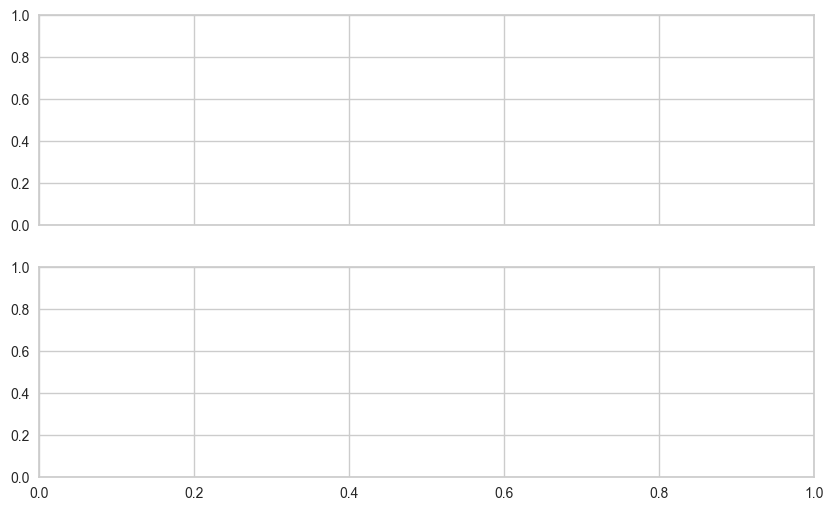

In [134]:
# Create subplots
fig, axs = plt.subplots(2, sharex=True, figsize=(10, 6))

# Plot time vs. sales
axs[0].plot(final_merged_data['date'], final_merged_data['sales'], color='b', label='Sales')
axs[0].set_ylabel('Sales')
axs[0].set_title('Sales Over Time')

# Customize the appearance of the first subplot
axs[0].grid(True)
axs[0].legend()

# Plot time vs. sales as a bar plot
axs[1].bar(final_merged_data['date'], final_merged_data['sales'], color='g', label='Sales')
axs[1].set_xlabel('Date')
axs[1].set_ylabel('Sales')

# Customize the appearance of the second subplot
axs[1].grid(True)
axs[1].legend()

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Adjust the layout of the subplots for better spacing
plt.tight_layout()

# Show the subplots
plt.show()

In [ ]:
# # save the DataFrame to a CSV file
# final_data_encoded.to_csv('encoded_data.csv', index=False)

# Data Splitted into Training, Validation, Test

In [ ]:
# Split Data to train and Test

# Create the feature dataframe using the selected columns
X = final_data_encoded.drop(["sales"], axis=1)

# Get the target variable
y = final_data_encoded.sales

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# DATA MODELING

In [ ]:
# Linear Regression Model
lr = LinearRegression()
lr.fit(X_train, y_train)

# Make prediction on X_test
lr_predictions = lr.predict(X_test)

In [ ]:
plt.scatter(y_test, lr_predictions)
plt.xlabel("True Values")
plt.ylabel("Predictions")
plt.title("Linear Regression")
plt.grid(False)
plt.show()

In [ ]:
# Evaluation Metrics for Linear Regression
lr_mse = mean_squared_error(y_test, lr_predictions).round(2)
lr_rmse = np.sqrt(lr_mse).round(2)

In [ ]:
# apply the absolute value function to y_test to remove negative signs
y_test_abs = abs(y_test)
lr_predictions_abs = abs(lr_predictions)


In [ ]:
# calculate the mean squared logarithmic error using the new y_test_abs and lr_predictions_abs array
lr_rmsle = np.sqrt(mean_squared_log_error(y_test_abs, lr_predictions_abs)).round(2)

In [ ]:
# Print the evaluation results for Linear Regression model
print("\nEvaluation Results for Linear Regression:")
print("MSE:", lr_mse)
print("RMSE:", lr_rmse)
print("RMSLE:", lr_rmsle)

### Decision Tree Regression Model

In [ ]:
# Decision Tree Regression Model
dt = DecisionTreeRegressor()
dt.fit(X_train, y_train)

# Make prediction on X_test
dt_predictions = dt.predict(X_test)

In [ ]:
plt.scatter(y_test, dt_predictions)
plt.xlabel("True Values")
plt.ylabel("Predictions")
plt.title("Decision Tree Regression")
plt.grid(False)
plt.show()

In [ ]:
# pip install mean_squared_log_error